In [21]:
import os
from glob import glob
import json
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure
import gc


datadirs = glob("structured-2018*")
#os.chdir('/home/vagrant/work/week6/cwl-data/maps/ww2/')
os.chdir('/home/vagrant/work/week7')

In [22]:



def visualizematch(matchdata, background_image, imagefile):
    spawn_xs = []
    spawn_ys = []
    death_xs = []
    death_ys = []
    for e in matchdata['events']:
        if e['type'] == 'spawn':
            spawn_ys.append(e['data']['pos']['y'])
            spawn_xs.append(e['data']['pos']['x'])
        if e['type'] == 'death':
            death_ys.append(e['data']['pos']['y'])
            death_xs.append(e['data']['pos']['x'])
        # create figure
        fig, ax = plt.subplots(1,1)
        fig = Figure()
        FigureCanvas(fig)
        ax = fig.subplots(1,1)
        
        fig.set_figheight(15)
        fig.set_figwidth(15)
        
        ##plot background
        img = plt.imread(background_image)
        ax.imshow(img)
        
        ax.set_facecolor((210/255.0, 210/255.0, 210/255.0))
        #plot spawns and deaths
        ax.scatter(spawn_xs, spawn_ys, color='cyan')
        ax.scatter(death_xs, death_ys, color = 'red')
         # plot kill vectors
      
        ax.set_title('{} ({})'.format(matchdata['map'], matchdata['mode']))
        fig.savefig(imagefile)
        
       # plt.cla()
       # plt.clf()
        #plt.close()
       # gc.collect()
        
        

In [23]:
import ujson
maprootdir = os.path.join('..', 'week6', 'cwl-data', 'maps', 'ww2')

map_images = { 
    'Achen': 'aachen.png',
    'Ardennes Forest': 'ardennes_forest.png',
    'Flak Tower': 'flaktower.png',
    'Gibraltar': 'gibraltar.png',
    'London Docks': 'london_docks.png',
    'Sainte Marie du Mont': 'sainte_marie_du_mont.png',
    'USS Texas': 'uss_texas.png',
    'Valkyrie': 'valkyrie.png'
}

def parsejsonmatch(jsonfile, imagefile):
    with open(jsonfile, 'r')as f:
        rawdata = f.read()
    data = ujson.loads(rawdata)
    
    mapname = data['map']
    if mapname in map_images:
        mapfilename = map_images[mapname]
        background_image = os.path.join(maprootdir, mapfilename)
        visualizematch(data, background_image, imagefile)
    else:
        print('Bad mapname encountered in {}'.format(jsonfile))
        

/home/vagrant/miniconda3/envs/py37/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


KeyboardInterrupt: 

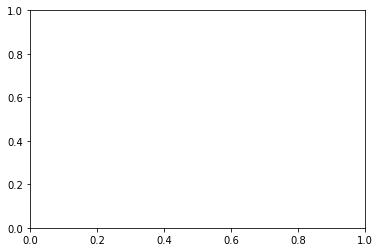

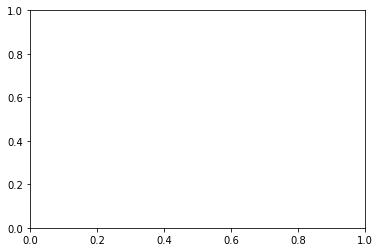

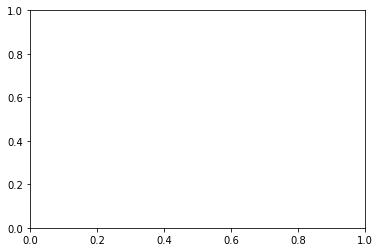

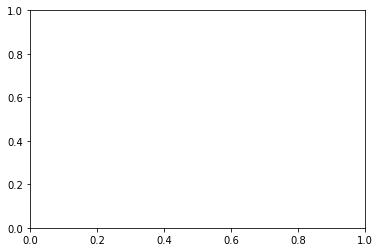

In [ ]:
#loop through all the images and create the png
for datadir in datadirs:
    imagedir = 'images_' + datadir
    if not os.path.exists(imagedir):
        os.mkdir(imagedir)
    jsonfiles = glob(os.path.join(datadir, "*.json"))
    for jsonfile in jsonfiles:
        basename = os.path.basename(jsonfile)
        noextension = os.path.splitext(basename)[0]
        imagename = noextension + '.png'
        imagefile = os.path.join(imagedir, imagename)
        parsejsonmatch(jsonfile, imagefile)